In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
kun_uz = BeautifulSoup(requests.get('https://kun.uz/').text, 'html.parser')
elements = kun_uz.find_all("a", class_='news-lenta')
new_address = 'https://kun.uz'+str(elements[1]).split()[2][6:-2]
re2 = BeautifulSoup(requests.get(new_address).text,'html.parser')
elements2 = re2.find_all('p')

space = ' '
for a in elements2[:]:
    space += a.text.strip() + ' '

In [329]:
stop_words = ['билан','қолиб','қилишича','келиб','Аниқланишича','ўз','бир','бориб','бўлгани','ўтган','оз','ёки','Маймун','ўтиб','боис','чиқа','олмай','олиб','чиқилди','Ўтган','неча','марта','ўзгартирган','Бундан','деярли','аввал','туфайли',
              'қилинганидан','кейин','унинг','киритилади','билан','шаклида','Бу','ва','ўзига','км','бўлса-да','учун','кам','яшайди','Лекин','фоизини','кенг','қилувчи','деб','ҳисобланган','ва','дея','ҳам','кўп','шу','ҳамда','бу','чин']
result_word = []                                 
for word in space.lower().split():
  if word not in stop_words:
      result_word.append(word)      

In [330]:
result_number = []
for son in result_word:
  if son.isalpha():
    result_number.append(son)

In [331]:
result_dict = {}
for sana in result_number:
  result_dict[sana] = result_number.count(sana)

data = pd.Series(result_dict).reset_index()
data.columns = ['words','count']
data = data.sort_values(by='count', ascending=False)[:10]

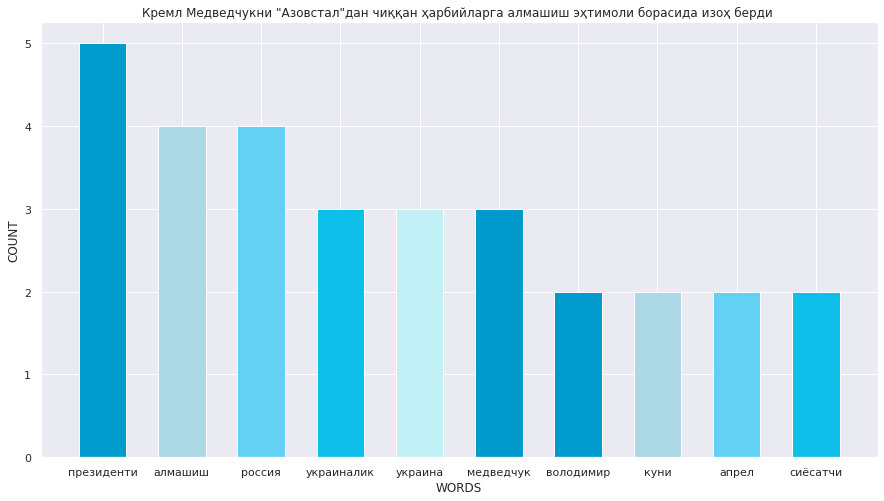

In [333]:
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9', '#C1F0F6', '#0099CC']
plt.figure(figsize=(15, 8)),sns.set()
plt.bar(data['words'], data['count'], width=0.6, color=color_palette_list )
plt.title('Кремл Медведчукни "Азовстал"дан чиққан ҳарбийларга алмашиш эҳтимоли борасида изоҳ берди ')
plt.xlabel('WORDS')
plt.ylabel('COUNT')
plt.show()